In [0]:
!wget https://www.dropbox.com/s/h1n73cw33no99mz/data.pth

--2020-03-27 21:27:57--  https://www.dropbox.com/s/h1n73cw33no99mz/data.pth
Resolving www.dropbox.com (www.dropbox.com)... 162.125.82.1, 2620:100:6032:1::a27d:5201
Connecting to www.dropbox.com (www.dropbox.com)|162.125.82.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/h1n73cw33no99mz/data.pth [following]
--2020-03-27 21:27:57--  https://www.dropbox.com/s/raw/h1n73cw33no99mz/data.pth
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc354eba7388b0d6b96921aeed53.dl.dropboxusercontent.com/cd/0/inline/A0sdvb_63epBeLNJUFIQ15msNfvZ2JnyNEgbzVZjb7JUXZZu3PYTSS8nR8j4ECEvsGjrQj0ihQJAtdOb7_viaVrkjLiYgKuUKE_Tpg1VvOvYkJnd3WTaJa2efcSk_waNoQo/file# [following]
--2020-03-27 21:27:57--  https://uc354eba7388b0d6b96921aeed53.dl.dropboxusercontent.com/cd/0/inline/A0sdvb_63epBeLNJUFIQ15msNfvZ2JnyNEgbzVZjb7JUXZZu3PYTSS8nR8j4ECEvsGjrQj0ihQJAtdOb7_viaVrkjLiYgKuUKE_Tpg1VvOvYkJnd3WTaJa2efcS

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import skimage.data
import skimage.color
import scipy.misc
import scipy.signal
import time

import torch
from torch.autograd import Variable
import torch.nn.functional as F

from matplotlib import rcParams
rcParams['axes.grid'] = False

import warnings
warnings.filterwarnings("ignore")

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
train_x, train_y, dev_x, dev_y, test_x = torch.load('data.pth')

print('Training size:', train_x.shape, train_y.shape)
print('Development size:', dev_x.shape, dev_y.shape)
print('Test size:', test_x.shape)

Training size: (45000, 3, 32, 32) (45000,)
Development size: (5000, 3, 32, 32) (5000,)
Test size: (10000, 3, 32, 32)


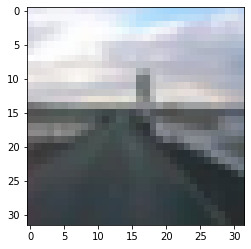

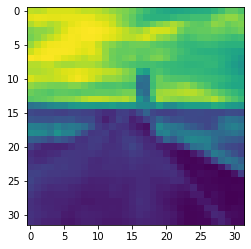

In [0]:
# show all three channels
plt.imshow(train_x[0].transpose((1, 2, 0)))
plt.show()

# show the first channel
plt.imshow(train_x[0, 0])
plt.show()

In [0]:
def set_seed(seed=1):
    #random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)

In [0]:
set_seed(1)

In [0]:
import torchvision

NUM_CLASSES = 100
CHANNELS = 3
HEIGHT = 32
WIDTH = 32

In [0]:
train_images, train_labels, val_images, val_labels, test_images = train_x, train_y, dev_x, dev_y, test_x

In [0]:
print(train_images.shape, train_labels.shape)
print(val_images.shape, val_labels.shape)

(45000, 3, 32, 32) (45000,)
(5000, 3, 32, 32) (5000,)


In [0]:
import torchvision.transforms as transforms
train_transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(p=1),
    transforms.ToTensor()
])

In [0]:
def data_augmentation(train_images, train_labels):
  for i in range(train_images.shape[0]):
      if i % 1000 == 0:
        print("Step: ", i)
      train_cur_image_PIL = transforms.ToPILImage()(train_images[i].transpose((1, 2, 0)))
      train_cur_image_tformed = train_transform(train_cur_image_PIL).reshape(1,3,32,32)
      
      if i % 1000 == 0:
          train_images_tformed_batch = train_cur_image_tformed
      else:
          train_images_tformed_batch = torch.cat((train_images_tformed_batch , train_cur_image_tformed),0)
      if i == 999:
          train_images_tformed = train_images_tformed_batch
      elif i % 1000 == 999:
          train_images_tformed = torch.cat((train_images_tformed , train_images_tformed_batch),0)
      #print(train_images_tformed.shape)
  #print(train_images_tformed)
  plt.imshow(transforms.ToPILImage()((train_images_tformed[0].data.numpy() * 255).astype(np.uint8).transpose((1, 2, 0))))
  train_images = np.concatenate((train_images, (train_images_tformed.data.numpy() * 255).astype(np.uint8)), axis = 0)
  train_labels = np.concatenate((train_labels, train_labels),axis = 0)
  return train_images, train_labels

Step:  0
Step:  1000
Step:  2000
Step:  3000
Step:  4000
Step:  5000
Step:  6000
Step:  7000
Step:  8000
Step:  9000
Step:  10000
Step:  11000
Step:  12000
Step:  13000
Step:  14000
Step:  15000
Step:  16000
Step:  17000
Step:  18000
Step:  19000
Step:  20000
Step:  21000
Step:  22000
Step:  23000
Step:  24000
Step:  25000
Step:  26000
Step:  27000
Step:  28000
Step:  29000
Step:  30000
Step:  31000
Step:  32000
Step:  33000
Step:  34000
Step:  35000
Step:  36000
Step:  37000
Step:  38000
Step:  39000
Step:  40000
Step:  41000
Step:  42000
Step:  43000
Step:  44000


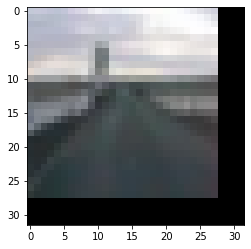

In [0]:
train_images, train_labels = data_augmentation(train_images, train_labels)

In [0]:
print(train_labels.shape)

(90000,)


In [0]:
print(train_images.shape)

(90000, 3, 32, 32)


In [0]:
train_images = (train_images).astype(np.float32)
val_images = (val_images).astype(np.float32)
tmp_test_images = test_images.astype(np.float32)

In [0]:
def normalize_stats_image_by_image(images):
  mean = images.mean(axis=(2,3), keepdims=True)
  stdev = images.std(axis=(2,3), keepdims=True)
  return (images - mean) / stdev

In [0]:
train_images = normalize_stats_image_by_image(train_images)
val_images = normalize_stats_image_by_image(val_images)
test_images = normalize_stats_image_by_image(tmp_test_images)

In [0]:
def batch(batch_size, training=True, batch_begin = 0):
  """Create a batch of examples.
  
  This creates a batch of input images and a batch of corresponding
  ground-truth labels. We assume CUDA is available (with a GPU).
  
  Args:
    batch_size: An integer.
    training: A boolean. If True, grab examples from the training
      set; otherwise, grab them from the validation set.
  
  Returns:
    A tuple,
    input_batch: A Variable of floats with shape
      [batch_size, 1, height, width]
    label_batch: A Variable of ints with shape
      [batch_size].
  """
  if training:
    random_ind = np.random.choice(train_images.shape[0], size=batch_size, replace=False)
    input_batch = train_images[random_ind]
    label_batch = train_labels[random_ind]
  else:
    input_batch = val_images[batch_begin:batch_begin + batch_size]
    label_batch = val_labels[batch_begin:batch_begin + batch_size]
  
  #input_batch = input_batch[:, np.newaxis, :, :]
  
  input_batch = torch.tensor(input_batch, requires_grad=False, device='cuda')
  label_batch = torch.tensor(label_batch, requires_grad=False, device='cuda')
  
  return input_batch, label_batch

In [0]:
def train_step(batch_size=128):
  
  model.train()

  input_batch, label_batch = batch(batch_size, training=True)
  output_batch = model(input_batch)
  #print(input_batch.shape)
  #print(output_batch.shape)
  #print(label_batch.shape)
  
  loss = F.cross_entropy(output_batch, label_batch)
  _, pred_batch = torch.max(output_batch, dim=1)
  error_rate = 1.0 - (pred_batch == label_batch).float().mean()

  optimizer.zero_grad()
  loss.backward()
  
  optimizer.step()
  
  return loss.item(), error_rate.item()

In [0]:
def val():
  
  model.eval()
  val_batch_size = 50;
  batch_begin = 0;
  sum_loss = 0
  while batch_begin < val_images.shape[0]: 
    input_batch, label_batch = batch(val_batch_size, training=False, batch_begin=batch_begin)
    output_batch = model(input_batch).detach()
    sum_loss += F.cross_entropy(output_batch, label_batch).detach() * val_batch_size
    _, pred_batch = torch.max(output_batch, dim=1)
    if batch_begin == 0:
      label = label_batch
      output = output_batch
      pred = pred_batch
    else:
      label = torch.cat((label, label_batch), 0)
      output = torch.cat((output, output_batch), 0)
      pred = torch.cat((pred, pred_batch), 0)
    #print(labels.shape)
    batch_begin += val_batch_size
    torch.no_grad()
    torch.cuda.empty_cache()


  loss = sum_loss / val_images.shape[0]
  error_rate = 1.0 - (pred == label).float().mean()
  
  return loss.item(), error_rate.item()

In [0]:
def test():
  
  model.eval()
  input_batch = torch.tensor(test_images, requires_grad=False, device = 'cuda')
  output_batch = model(input_batch)
  _, pred_batch = torch.max(output_batch, dim=1)

  return pred_batch

In [0]:
!nvidia-smi

Fri Mar 27 21:30:26 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
class SimpleCNN(torch.nn.Module):
  """A simple convolutional network.
  
  Map from inputs with shape [batch_size, 1, height, width] to
  outputs with shape [batch_size, 1].
  """
  
  def __init__(self):
    super().__init__()
    self.conv1 = torch.nn.Conv2d(3, 32, kernel_size=7, padding=7//2)
    self.bnm1 = torch.nn.BatchNorm2d(32, momentum=0.1)
    self.conv2 = torch.nn.Conv2d(32, 32, kernel_size=3, stride=2, padding=3//2)
    self.bnm2 = torch.nn.BatchNorm2d(32, momentum=0.1)
    self.conv3 = torch.nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=3//2)
    self.bnm3 = torch.nn.BatchNorm2d(64, momentum=0.1)
    self.conv4 = torch.nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=3//2)
    self.bnm4 = torch.nn.BatchNorm2d(128, momentum=0.1)
    self.conv5 = torch.nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=3//2)
    self.downsample1 = torch.nn.Conv2d(3,32,kernel_size = 1, stride = 2, padding=1//2)
    self.sample_bnm1 =  torch.nn.BatchNorm2d(32, momentum=0.1)
    self.downsample2 = torch.nn.Conv2d(32,128,kernel_size = 1, stride = 2, padding=1//2)
    self.sample_bnm2 =  torch.nn.BatchNorm2d(128, momentum=0.1)
    #self.bnm5 = torch.nn.BatchNorm2d(128, momentum=0.1)
    
    # Here the input to conv_final should be a single pixel, as can be obtained
    # by pooling spatially over all pixels. The goal of conv_final is to map
    # from some number of channels to 10, one for each possible class.
    self.conv_final = torch.nn.Conv2d(128, 100, kernel_size=1)
    
  def forward(self, x):
    residual1 = x 
    x = F.relu(self.conv1(x))
    x = self.bnm1(x)
    x = F.relu(self.conv2(x))
    x = self.bnm2(x)
    x = x + self.sample_bnm1(self.downsample1(residual1))
    residual2 = x
    x = F.relu(self.conv3(x))
    x = self.bnm3(x)
    x = F.relu(self.conv4(x))
    x = self.bnm4(x)
    x = x + self.sample_bnm2(self.downsample2(residual2))
    x = F.relu(self.conv5(x))
    spatial_shape = x.shape[2:]
    # Average each channel over spatial dimensions.
    x = F.avg_pool2d(x, kernel_size=spatial_shape)
    x = self.conv_final(x).view(-1, 100)
    return x


In [0]:
#import torchvision.models as models
#model = models.resnet152(pretrained=True, progress = True)
#model.fc = torch.nn.Linear(2048, 100)
model = SimpleCNN()
model.cuda()

SimpleCNN(
  (conv1): Conv2d(3, 32, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
  (bnm1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (bnm2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bnm3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (bnm4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv5): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (downsample1): Conv2d(3, 32, kernel_size=(1, 1), stride=(2, 2))
  (sample_bnm1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (downsample2): Conv2d(32, 128, kernel_size=(1, 1), stride=(2, 2))
  (sample_

In [0]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=5e-4)

Step     0: Obtained a best validation error of 1.000. The validation loss is 4.608.
Step   500: Obtained a best validation error of 0.989. The validation loss is 3.194.
Step  1000: Obtained a best validation error of 0.779. The validation loss is 2.813.
Step  1500: Obtained a best validation error of 0.709. The validation loss is 2.652.
Step  2000: Obtained a best validation error of 0.664. The validation loss is 2.486.
Step  2500: Obtained a best validation error of 0.638. The validation loss is 2.370.
Step  3000: Obtained a best validation error of 0.616. The validation loss is 2.275.
Step  3500: Obtained a best validation error of 0.588. The validation loss is 2.227.
Step  4000: Obtained a best validation error of 0.579. The validation loss is 2.239.
Step  4500: Obtained a best validation error of 0.579. The validation loss is 2.187.
Step  5000: Obtained a best validation error of 0.561. The validation loss is 2.153.
Step  5500: Obtained a best validation error of 0.561. The valida

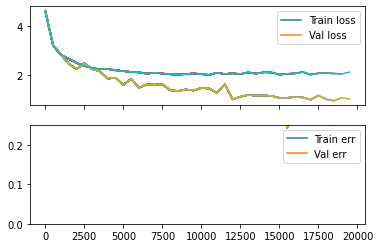

In [0]:
# Let's make sure we always start from scratch (that is,
# without starting from parameters from a previous run).
#for module in model.children():
#  module.reset_parameters()

info = []
fig, ax = plt.subplots(2, 1, sharex=True)
num_steps = 20000
num_steps_per_val = 500
best_val_err = 1.0
for step in range(num_steps):
  train_loss, train_err = train_step()
  if step % num_steps_per_val == 0:
    val_loss, val_err = val()
    print('Step {:5d}: Obtained a best validation error of {:.3f}. The validation loss is {:.3f}.'.format(step, best_val_err, val_loss))
    if val_err < best_val_err:
      best_val_err = val_err
    info.append([step, train_loss, val_loss, train_err, val_err])
    x, y11, y12, y21, y22 = zip(*info)
    ax[0].plot(x, y11, x, y12)
    ax[0].legend(['Train loss', 'Val loss'])
    ax[1].plot(x, y21, x, y22)
    ax[1].legend(['Train err', 'Val err'])
    ax[1].set_ylim([0.0, 0.25])

In [0]:
model_path = "/content/drive/My Drive/result_script9.pth"
torch.save(model, model_path) 

In [0]:
path = "/content/drive/My Drive/result_script9.txt"
prediction = test()
from typing import List
def write_prediction(prediction: List[int], filename: str):
    with open(filename, 'w') as fp:
        print('Id,Category', file=fp)
        for i, pred in enumerate(prediction):
            print(f'{i},{pred}', file=fp)
write_prediction(prediction, path)